In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_train=pd.read_csv("./data/train_V2.csv")
df_test =pd.read_csv("./data/test_V2.csv")

In [4]:
df_train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


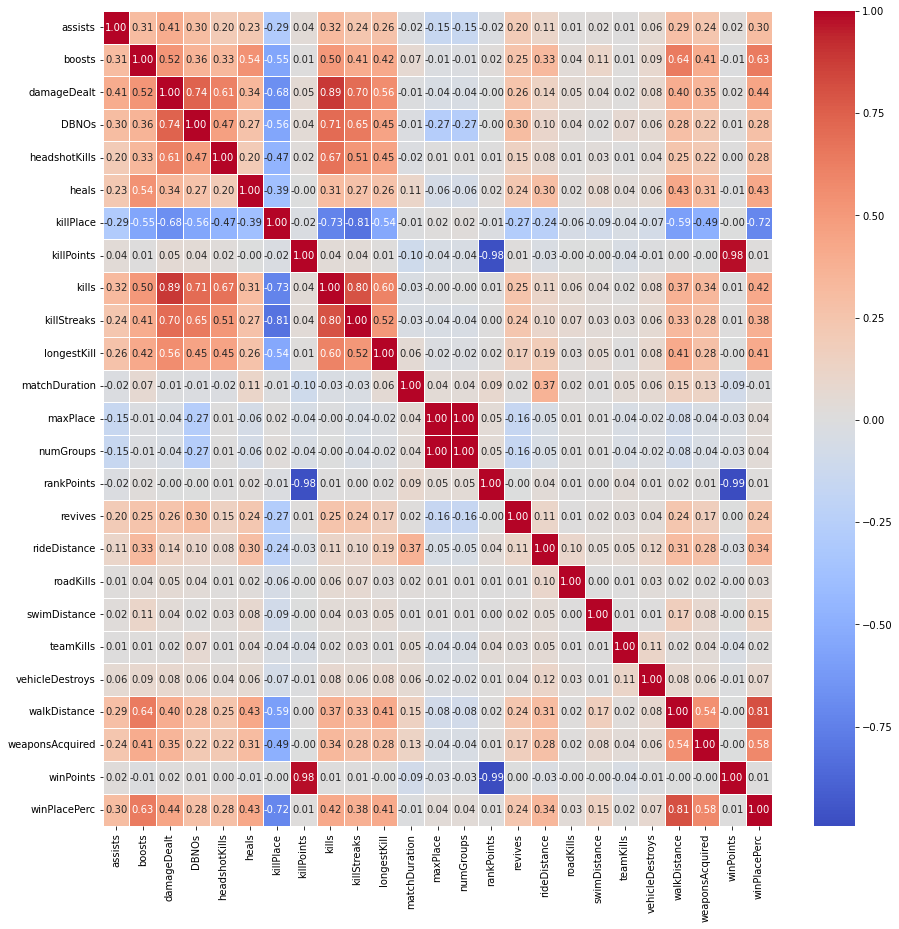

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_train.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
df_train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [8]:
train_copy = df_train.drop(['Id','groupId','matchId'], axis=1)

In [9]:
train_copy.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0,2,268.00,0,0,1,18,0,2,1,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [10]:
train_copy.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [11]:
train_copy['winPlacePerc'] = train_copy['winPlacePerc'].replace(np.NaN,'NaN')
train_copy.dropna(axis=0)
print(train_copy.isna().sum())

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


In [12]:
train_copy = train_copy.astype({'winPlacePerc':'float64'})

In [13]:
train_solo = train_copy[train_copy['matchType'] == 'solo']

In [14]:
train_solo = train_solo.drop(['DBNOs','revives'], axis=1)

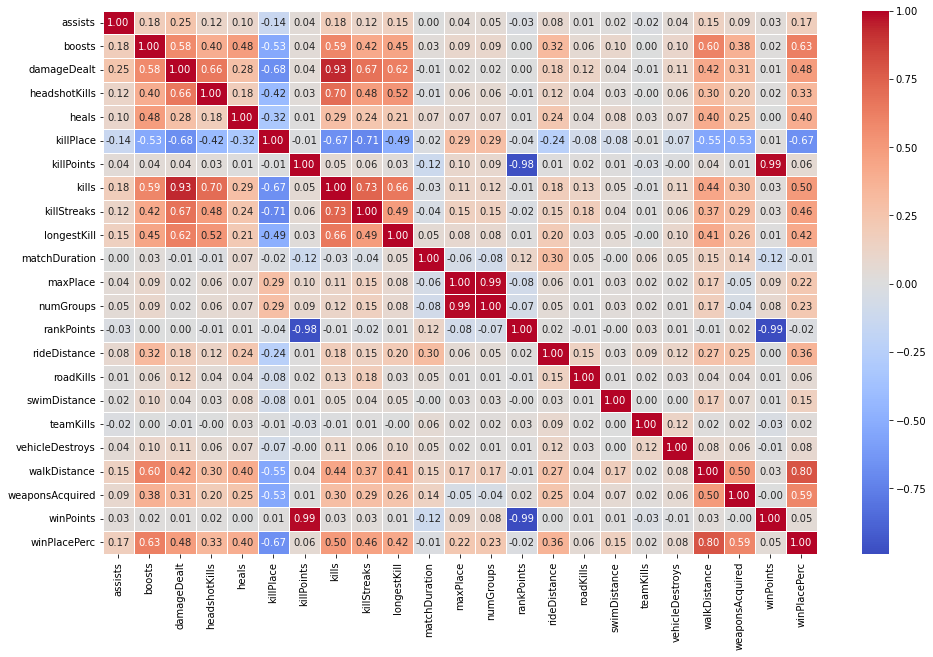

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(train_solo.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

In [16]:
train_duo = train_copy[train_copy['matchType'] == 'duo']

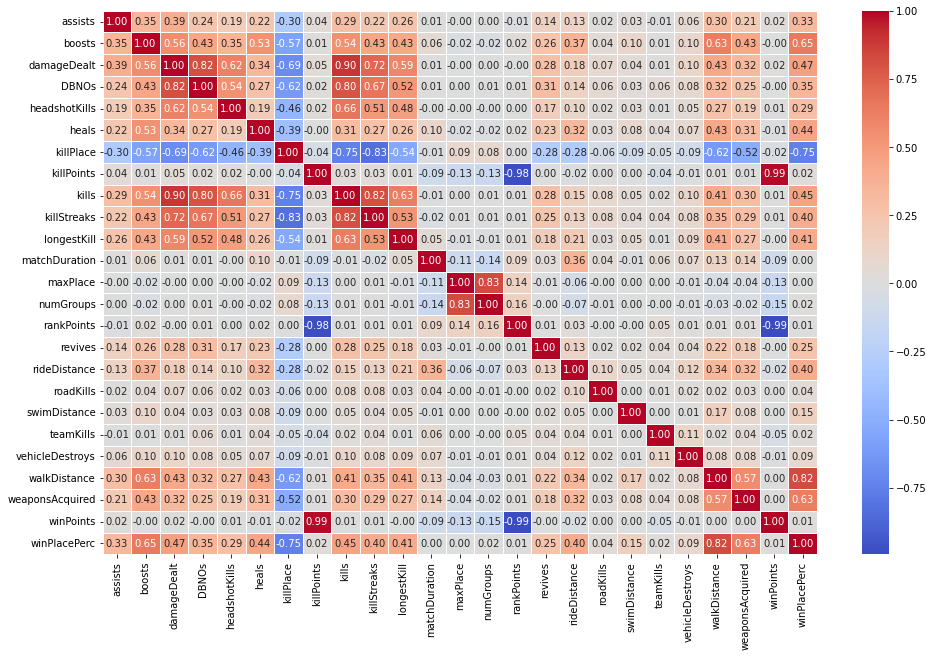

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(train_duo.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

In [18]:
train_squad = train_copy[train_copy['matchType'] == 'squad']

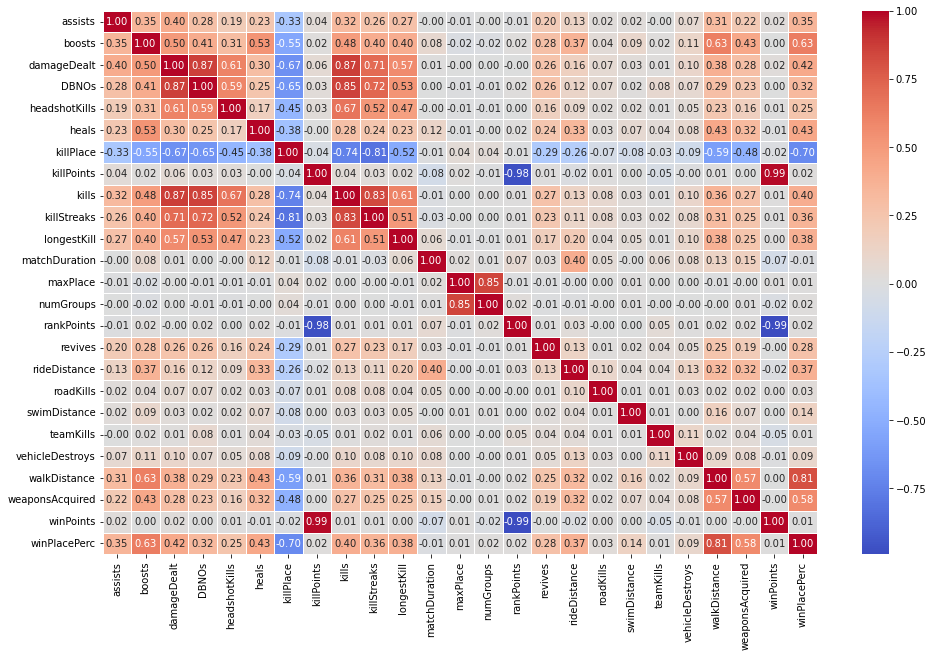

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(train_squad.corr(), annot=True, linewidths=1, fmt= '.2f',cmap='coolwarm')
plt.show()

In [20]:
train_match = train_copy.loc[:,'matchType'].value_counts().to_frame()
train_match

,matchType
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536762
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


In [21]:
match_solo = train_match.loc[['solo','solo-fpp'],'matchType'].sum()
match_duo  = train_match.loc[['duo','duo-fpp'],'matchType'].sum()
match_squad  = train_match.loc[['squad','squad-fpp'],'matchType'].sum()

In [22]:
match_type = pd.DataFrame([match_solo,match_duo,match_squad], index = ['solo','duo','squad'], columns=['counts'])

<AxesSubplot:ylabel='counts'>

<Figure size 720x432 with 0 Axes>

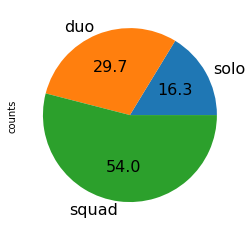

In [37]:
plt.figure(figsize = (10,6))
match_type.plot.pie(y='counts',legend=False,autopct='%.1f',fontsize = 16)

In [50]:
train_copy.loc[:,'kills'].value_counts().to_frame()

,kills
0,2529722
1,928079
2,472466
3,232441
4,124543
5,66577
6,37960
7,21816
8,12779
9,7644


Text(0.5, 1.0, 'Kills')

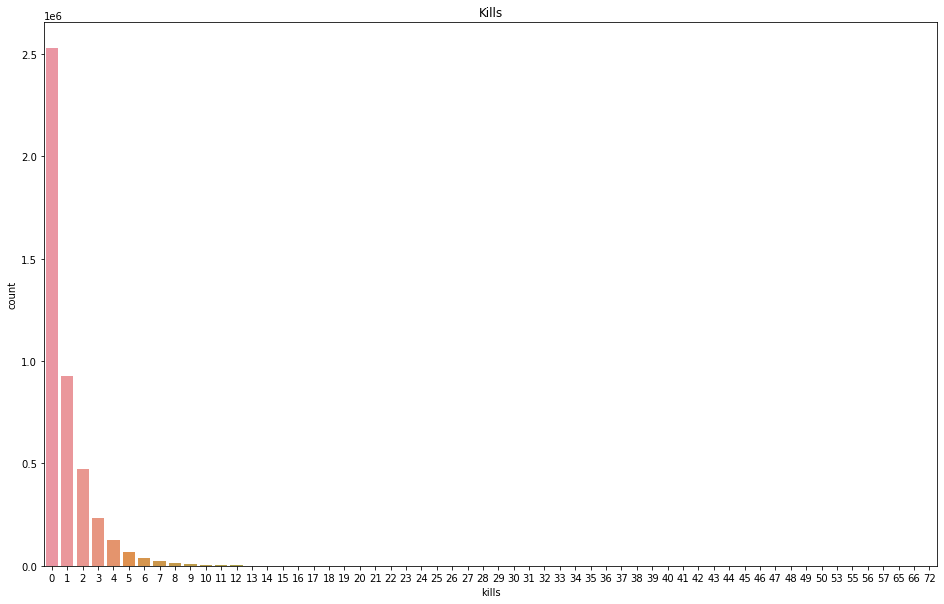

In [51]:
plt.subplots(figsize=(16,10))
sns.countplot(train_copy['kills']).set_title("Kills")